## MARS MET Data

The Canadian Space Agency has posted massive amounts of data collected from various space missions. A good place to start is the CSA's Open Data archives, which you can find here:

**ftp://ftp.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/**

To acccess this servier, copy and paste the above address into a new browser window or tab. 


We are interested in the data from the Phoenix Mars mission, which landed a robotic spacecraft of the surface of Mars in May 2008. You can read about it on Wikipedia:
[https://en.wikipedia.org/wiki/Phoenix_(spacecraft)](https://en.wikipedia.org/wiki/Phoenix_(spacecraft))

On the Phoenix lander, there were several instruments used to monitor the weather on Mars. Some of this data is available from the CSA in the MET directory of their data archive:

ftp://ftp.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MET/

It is interesting to dig around and see what all is available from this mission.


As a start, let's look in this directory

ftp://ftp.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MET/phx-m-met-3-pt-rdr-v10/phmt_0001/DATA/MS000/RDR/

These two files:
- MS000RML_00896227783_10C6M1.TAB.csv
- MS000RML_00896227783_10C6M1.LBL

The first file is a .csv file, known as a "comma separated values" file, which looks like a big spreadsheet. The second file is a text file marked .LBL. It contains the information that labels the data in the .csv file. 

We have already downloaded these two files into the github repo for you. 

We can now read the label file with a simple cat command from a Jupyter magic cell, like this:


In [1]:
%cat MS000RML_00896227783_10C6M1.LBL

As you read through that listing of labels, we see that Mars is mentioned, the Phoenix is mentioned, MET (Meterology) is mentioned, the data of May 26, 2008 is mentioned, and so on.

Several mentions of pressure and temperature are mentioned. This looks promising!

Digging deeper, we see something about sensors at 250mm, 500mm, and 1000mm. If we read the Wikipedia page mentioned above, we notice that the lander has three temperature sensors located at those three distance above the lander deck. The highest one is one meter about the deck of the lander/instrument pad.

So with this information, it seems we can now load in the .csv file and start to visualize some of the data.

## Our code

First we load in some useful packages. Numerical Python, Python Data Analytics, and Python Plotting Library. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Next:

We read in the csv file into a DataFrame, and take a look at it.

In [3]:
df = pd.read_csv('MS000RML_00896227783_10C6M1.TAB.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,510.0,858.9916,0.2236,858.4460,859.3019,239.7704,1.6376,235.9773,244.2097,236.1407,...,238.0326,236.8546,0.6930,235.4549,239.3096,257.8390,0.2633,257.35,258.27,1
1,1022.0,859.2584,0.0528,859.1033,859.3484,241.7568,2.4495,235.5567,247.5553,237.7434,...,242.1291,238.3140,1.5348,235.1245,242.1332,258.6283,0.2161,258.24,258.97,1
2,1534.0,858.7828,0.3120,858.1426,859.1703,237.7342,2.0182,234.0048,243.8691,235.3444,...,237.5218,235.7138,0.7263,233.9131,237.3973,259.1064,0.0616,258.97,259.21,1
3,2046.0,857.7884,0.1807,857.4885,858.1806,240.9263,1.4956,236.3277,244.1596,236.5632,...,239.4148,237.2065,0.8621,235.3648,239.6100,259.2907,0.0495,259.19,259.37,1
4,2558.0,857.3821,0.0835,857.0988,857.5460,241.0160,1.7013,235.3264,243.8591,236.9695,...,239.4649,237.6657,1.1991,234.7641,239.7902,259.3992,0.0151,259.34,259.43,1


Lots of Data here. We can plot something, like the first two columns.

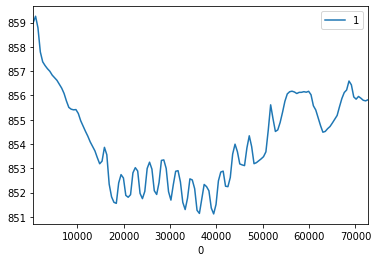

In [4]:
df.plot(x=0,y=1);

### Interesting, 

But not very information. Looking back at the LBL (Label) file, we see the first column is time, second column is average pressure, and sixth column is average temperature (at the 250mm sensor). So let's label those columns appropriately.

Remember, though, that Python indices start from 0. 

In [5]:
df = df.rename(columns={0:'Time (sec)', 1:'Pressure (Pascal)', 5:'Temp (Kelvin)'})
df.head()

,Time (sec),Pressure (Pascal),2,3,4,Temp (Kelvin),6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,510.0,858.9916,0.2236,858.4460,859.3019,239.7704,1.6376,235.9773,244.2097,236.1407,...,238.0326,236.8546,0.6930,235.4549,239.3096,257.8390,0.2633,257.35,258.27,1
1,1022.0,859.2584,0.0528,859.1033,859.3484,241.7568,2.4495,235.5567,247.5553,237.7434,...,242.1291,238.3140,1.5348,235.1245,242.1332,258.6283,0.2161,258.24,258.97,1
2,1534.0,858.7828,0.3120,858.1426,859.1703,237.7342,2.0182,234.0048,243.8691,235.3444,...,237.5218,235.7138,0.7263,233.9131,237.3973,259.1064,0.0616,258.97,259.21,1
3,2046.0,857.7884,0.1807,857.4885,858.1806,240.9263,1.4956,236.3277,244.1596,236.5632,...,239.4148,237.2065,0.8621,235.3648,239.6100,259.2907,0.0495,259.19,259.37,1
4,2558.0,857.3821,0.0835,857.0988,857.5460,241.0160,1.7013,235.3264,243.8591,236.9695,...,239.4649,237.6657,1.1991,234.7641,239.7902,259.3992,0.0151,259.34,259.43,1


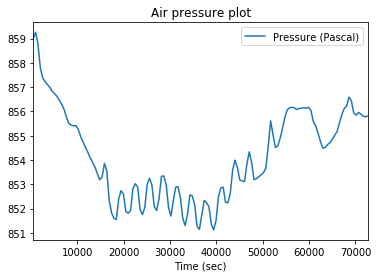

In [6]:
df.plot(x='Time (sec)',y='Pressure (Pascal)', title='Air pressure plot');

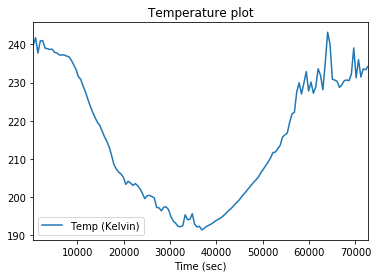

In [7]:
df.plot(x='Time (sec)',y='Temp (Kelvin)', title='Temperature plot');

These are more informative plots.

However, we might like to change to units that are more familiar.

Perhaps Time in seconds could be change to time in Mars-length days (How many seconds in a day on Mars?)

Perhaps Temperature could be converted to degree Celcius (note 273.15 K = 0 Celsius)

Perhaps pressure could be converted to some fraction of one earth atmosphere. (Earth air pressure at sea level is about 1 Bar, or 1000 hectoPascal. So, how many Pascals is that?)

## Challenges:

- try plotting the temperatures at the other sensors, at 500mm and 1000mm. Is there any significant differences?
- try investigating some of the other files in nearby directories. Is there more data, for other days on the mission? The mission did go for 150 days, and all that data is online. 
- note that the data in these directories is actually organized, see if you can figure it out. For instance, the file name starting with MS000RML means this is day 0 of the mission. File MS001RML is day 1 of the mission. The files were collected in 3 phases, so you can look around in nearby directories to find files up to MS150RML...
- Can you automate, and see the temperature data for all 150 days?

## Some notes on accessing the CSA data

The CSA data is available through an FTP server. We can specify the URL and download the data directly, without having to copy a file into our Callysto directory. 

### Day 0
Here is an example of how to access the Day 0 data, directly from the FTP server.

In [8]:
url = "ftp://ftp.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MET/phx-m-met-3-pt-rdr-v10/phmt_0001/DATA/MS000/RDR/MS000RML_00896227783_10C6M1.TAB.csv"
df0 = pd.read_csv(url,header=None)
df0.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,510.0,858.9916,0.2236,858.4460,859.3019,239.7704,1.6376,235.9773,244.2097,236.1407,...,238.0326,236.8546,0.6930,235.4549,239.3096,257.8390,0.2633,257.35,258.27,1
1,1022.0,859.2584,0.0528,859.1033,859.3484,241.7568,2.4495,235.5567,247.5553,237.7434,...,242.1291,238.3140,1.5348,235.1245,242.1332,258.6283,0.2161,258.24,258.97,1
2,1534.0,858.7828,0.3120,858.1426,859.1703,237.7342,2.0182,234.0048,243.8691,235.3444,...,237.5218,235.7138,0.7263,233.9131,237.3973,259.1064,0.0616,258.97,259.21,1
3,2046.0,857.7884,0.1807,857.4885,858.1806,240.9263,1.4956,236.3277,244.1596,236.5632,...,239.4148,237.2065,0.8621,235.3648,239.6100,259.2907,0.0495,259.19,259.37,1
4,2558.0,857.3821,0.0835,857.0988,857.5460,241.0160,1.7013,235.3264,243.8591,236.9695,...,239.4649,237.6657,1.1991,234.7641,239.7902,259.3992,0.0151,259.34,259.43,1


### Day 1
To get Day 1, we have to change the URL. By exploring with our web browser, we can find the data with this URL.


In [9]:
url = "ftp://ftp.asc-csa.gc.ca/users/OpenData_DonneesOuvertes/pub/MET/phx-m-met-3-pt-rdr-v10/phmt_0001/DATA/MS001/RDR/MS001RML_00896302797_10CCM1.TAB.csv"
df1 = pd.read_csv(url,header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,510.0,855.9342,0.1103,855.1727,856.0866,234.8366,3.2391,230.4710,245.9125,233.6041,...,240.2161,233.5208,2.1979,230.3494,240.6914,257.7392,0.0919,257.57,257.91,1
1,1022.0,855.9041,0.0615,855.7787,856.1077,243.9183,4.1035,231.8624,250.9210,240.2700,...,246.8546,240.2125,2.9597,231.2203,245.3671,258.1010,0.1178,257.87,258.30,1
2,1534.0,856.7406,0.2312,856.0652,856.9713,235.3216,2.7341,230.6612,244.8207,234.1688,...,240.9973,234.2105,1.8901,230.9900,239.2195,258.4302,0.0564,258.30,258.53,1
3,2046.0,856.7522,0.1132,856.5383,856.9492,240.9014,5.3667,231.1016,248.9176,237.7823,...,245.2240,238.1438,4.0336,231.1001,244.7163,258.6268,0.0805,258.51,258.79,1
4,2558.0,856.4716,0.0617,856.3481,856.6074,237.5289,4.1317,231.7923,250.4803,236.4845,...,246.7745,236.4059,3.0568,231.9910,244.9867,258.9532,0.1100,258.79,259.14,1


### Day 2,3,4 etc.

I'm not sure we can see a pattern here in the directory and file names. 

Notice 
- Day 0 is in directory MS000
- Day 1 is in directory MS001

The data is in a particular file:
- Day 0 is in file MS000RML_00896227783_10C6M1.TAB.csv
- Day 1 is in file MS001RML_00896302797_10CCM1.TAB.csv

So there is that counter 000, 001 that seems to follow a pattern. The file name has a numerical string 00896... that keeps changing, and I'm not sure what the patter is. Also notice the 10C6M1 and 10CCM1 in the file names are slightly different.

You could just look up each file for each day, up to day 150, and type in the file names. Kind of boring.

## Challenge: can you automate this file loading, to get all 150 days of data?

Here is another catch.

The directory phmt_0001 only holds the first 30 days of data. You will also need to explore directories phmt_0002 and phmt_0003 for the remaining days of data.  

Again, it would be nice to automate this, so you don't have to type in every file name. How can you do this?

## Challenge:

Get all 150 days of data, and plot the temperatures in one single graph, for all the days together.
